- This notebook is to generate high probability samples that have replaced 5 similar amphiphiles

In [1]:
import os 
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [4]:
from joblib import load
import numpy as np
import pandas as pd
import pickle

from Extrapolability import get_sample_fromGP, get_sample_lack_feature, classifier_performance_update, get_sample_lack_features_mul
from utils import *

# from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF  
from sklearn.ensemble import RandomForestClassifier

In [17]:
from tqdm import tqdm

In [15]:
# Load the model that updated based on experiment data
import joblib

model_clf_update = joblib.load("model_clf_update_fm_20250806.pkl")

In [13]:
model_path = '/Users/haoliu/Documents/GitHub/MicroscopyAnalysis/GPC_model_20240713.pkl' # GP model
info_path = '/Users/haoliu/Documents/Hao/Fordham/Cheminformatics/MD/Amphiphiles/Info.csv' # 7 amphipihles in AL paper

# Data set with only old molecules
# Feature = ['All_features_reserved']
df_large, model_gp = get_sample_fromGP(model_path, info_path, n_samples=100000)

In [75]:
df_large.shape

(100000, 15)

In [43]:
info_path = '/Users/haoliu/Documents/Hao/Fordham/Cheminformatics/MD/Amphiphiles/info_new_molecules.csv'
df_info = pd.read_csv(info_path)

new_smiles = df_info['SMILES'].iloc[:5].tolist()
new_smiles

['CCCCCCCCCC=O',
 'CC(=CCC/C(=C/CO)/C)C',
 'CCCCCCCCCCCCCCCC(=O)O',
 'CCCC/C=C\\CCCCCCCC(=O)O',
 'CCCCCCCCOC(=O)CN.Cl']

In [48]:
from tqdm import tqdm
import numpy as np

target = 100
pbar = tqdm(total=target, desc="High-probability samples found", unit="sample")

high_prob_dfs = []
total_found = 0

for replacement_set in replacement_sets:
    df_new = df_large.copy()
    for col, new_smi in zip(replacement_set, new_smiles):
        df_new[col] = new_smi

    x_new = get_latent_space(df_new)
    y_pred = model_clf_update.predict_proba(x_new)[:, 1]
    df_new['vesicles_formation'] = y_pred

    high_prob_indices = np.where(y_pred > 0.8)[0]

    if len(high_prob_indices) > 0:
        high_samples = df_new.iloc[high_prob_indices].copy()
        
        # Calculate how many more samples we need
        remaining = target - total_found
        if len(high_samples) > remaining:
            high_samples = high_samples.iloc[:remaining]  # Only take what's needed

        high_prob_dfs.append(high_samples)
        pbar.update(len(high_samples))
        total_found += len(high_samples)

        if total_found >= target:
            break

pbar.close()



High-probability samples found:   0%|          | 0/100 [00:00<?, ?sample/s]

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:00,  6.46it/s]

 29%|██▊       | 2/7 [00:00<00:00,  6.96it/s]

 43%|████▎     | 3/7 [00:00<00:00,  6.39it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  6.60it/s]

 71%|███████▏  | 5/7 [00:00<00:00,  7.38it/s]

 86%|████████▌ | 6/7 [00:00<00:00,  7.62it/s]

100%|██████████| 7/7 [00:01<00:00,  6.86it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:00,  6.48it/s]

 29%|██▊       | 2/7 [00:00<00:00,  6.88it/s]

 43%|████▎     | 3/7 [00:00<00:00,  7.22it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  6.80it/s]

 71%|███████▏  | 5/7 [00:00<00:00,  7.13it/s]

 86%|████████▌ | 6/7 [00:00<00:00,  6.99it/s]

100%|██████████| 7/7 [00:00<00:00,  7.00it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))

High-probability samples found:  18%|█▊        | 18/100 [01:19<06:04,  4.44s/sample]

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:01,  5.95it/s]

 29%|██▊       | 2/7 [00:00<00:00,  5.11it/s]

 43%|████▎     | 3/7 [00:00<00:00,  4.93it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  6.08it/s]

 71%|███████▏  | 5/7 [00:00<00:00,  6.80it/s]

100%|██████████| 7/7 [00:00<00:00,  7.23it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))

High-probability samples found:  24%|██▍       | 24/100 [01:59<06:28,  5.12s/sample]

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:00,  9.08it/s]

 29%|██▊       | 2/7 [00:00<00:01,  3.46it/s]

 43%|████▎     | 3/7 [00:00<00:00,  4.24it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  4.24it/s]

 71%|███████▏  | 5/7 [00:01<00:00,  4.60it/s]

 86%|████████▌ | 6/7 [00:01<00:00,  5.43it/s]

100%|██████████| 7/7 [00:01<00:00,  5.00it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))

High-probability samples found:  25%|██▌       | 25/100 [02:39<09:31,  7.62s/sample]

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [00:00<00:00,  8.04it/s]

 43%|████▎     | 3/7 [00:00<00:00,  6.75it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  6.91it/s]

 71%|███████▏  | 5/7 [00:00<00:00,  5.95it/s]

 86%|████████▌ | 6/7 [00:00<00:00,  5.92it/s]

100%|██████████| 7/7 [00:01<00:00,  6.39it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))

High-probability samples found:  26%|██▌       | 26/100 [03:18<13:02, 10.58s/sample]

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:00,  8.42it/s]

 29%|██▊       | 2/7 [00:00<00:00,  5.30it/s]

 43%|████▎     | 3/7 [00:00<00:00,  6.15it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  7.13it/s]

 71%|███████▏  | 5/7 [00:00<00:00,  6.49it/s]

 86%|████████▌ | 6/7 [00:00<00:00,  6.50it/s]

100%|██████████| 7/7 [00:01<00:00,  6.76it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/utils.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))

High-probability samples found: 100%|██████████| 100/100 [03:57<00:00,  2.38s/sample]


In [81]:
replacement_sets

[('smi1', 'smi2', 'smi3', 'smi4', 'smi5'),
 ('smi1', 'smi2', 'smi3', 'smi4', 'smi6'),
 ('smi1', 'smi2', 'smi3', 'smi4', 'smi7'),
 ('smi1', 'smi2', 'smi3', 'smi5', 'smi6'),
 ('smi1', 'smi2', 'smi3', 'smi5', 'smi7'),
 ('smi1', 'smi2', 'smi3', 'smi6', 'smi7'),
 ('smi1', 'smi2', 'smi4', 'smi5', 'smi6'),
 ('smi1', 'smi2', 'smi4', 'smi5', 'smi7'),
 ('smi1', 'smi2', 'smi4', 'smi6', 'smi7'),
 ('smi1', 'smi2', 'smi5', 'smi6', 'smi7'),
 ('smi1', 'smi3', 'smi4', 'smi5', 'smi6'),
 ('smi1', 'smi3', 'smi4', 'smi5', 'smi7'),
 ('smi1', 'smi3', 'smi4', 'smi6', 'smi7'),
 ('smi1', 'smi3', 'smi5', 'smi6', 'smi7'),
 ('smi1', 'smi4', 'smi5', 'smi6', 'smi7'),
 ('smi2', 'smi3', 'smi4', 'smi5', 'smi6'),
 ('smi2', 'smi3', 'smi4', 'smi5', 'smi7'),
 ('smi2', 'smi3', 'smi4', 'smi6', 'smi7'),
 ('smi2', 'smi3', 'smi5', 'smi6', 'smi7'),
 ('smi2', 'smi4', 'smi5', 'smi6', 'smi7'),
 ('smi3', 'smi4', 'smi5', 'smi6', 'smi7')]

In [82]:
len(replacement_sets)

21

In [42]:
new_smiles

['CCCCCCCCCC=O',
 'CC(=CCC/C(=C/CO)/C)C',
 'CCCCCCCCCCCCCCCC(=O)O',
 'CCCC/C=C\\CCCCCCCC(=O)O',
 'CCCCCCCCOC(=O)CN.Cl']

In [49]:
len(high_prob_dfs)

5

In [50]:
high_prob_dfs

[               smi1     conc1                  smi2     conc2  \
 6816   CCCCCCCCCC=O  0.771636  CC(=CCC/C(=C/CO)/C)C  0.174937   
 8044   CCCCCCCCCC=O  0.302777  CC(=CCC/C(=C/CO)/C)C  0.363812   
 26682  CCCCCCCCCC=O  0.052338  CC(=CCC/C(=C/CO)/C)C  0.091095   
 30640  CCCCCCCCCC=O  0.525431  CC(=CCC/C(=C/CO)/C)C  0.110133   
 41646  CCCCCCCCCC=O  0.866239  CC(=CCC/C(=C/CO)/C)C  0.097405   
 53159  CCCCCCCCCC=O  0.197463  CC(=CCC/C(=C/CO)/C)C  0.004044   
 54681  CCCCCCCCCC=O  1.065635  CC(=CCC/C(=C/CO)/C)C  0.171581   
 57305  CCCCCCCCCC=O  0.450642  CC(=CCC/C(=C/CO)/C)C  0.132994   
 57706  CCCCCCCCCC=O  0.118419  CC(=CCC/C(=C/CO)/C)C  0.211390   
 58941  CCCCCCCCCC=O  0.310854  CC(=CCC/C(=C/CO)/C)C  0.077498   
 61787  CCCCCCCCCC=O  0.333211  CC(=CCC/C(=C/CO)/C)C  0.048867   
 68379  CCCCCCCCCC=O  0.119656  CC(=CCC/C(=C/CO)/C)C  0.132029   
 69788  CCCCCCCCCC=O  0.055443  CC(=CCC/C(=C/CO)/C)C  0.577239   
 69832  CCCCCCCCCC=O  0.632715  CC(=CCC/C(=C/CO)/C)C  0.221085   
 74318  CC

In [51]:
selected_df = pd.concat(high_prob_dfs, ignore_index=True)
selected_df

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,CCCCCCCCCC=O,0.771636,CC(=CCC/C(=C/CO)/C)C,0.174937,CCCCCCCCCCCCCCCC(=O)O,0.245417,CCCC/C=C\CCCCCCCC(=O)O,0.508786,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.705084,CCCCCCCCOC(=O)CN.Cl,0.611342,CCCCCCCCCC(=O)OCC(CO)O,0.218086,0.82
1,CCCCCCCCCC=O,0.302777,CC(=CCC/C(=C/CO)/C)C,0.363812,CCCCCCCCCCCCCCCC(=O)O,0.759700,CCCC/C=C\CCCCCCCC(=O)O,0.108760,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.729800,CCCCCCCCOC(=O)CN.Cl,0.512987,CCCCCCCCCC(=O)OCC(CO)O,0.563728,0.82
2,CCCCCCCCCC=O,0.052338,CC(=CCC/C(=C/CO)/C)C,0.091095,CCCCCCCCCCCCCCCC(=O)O,0.917382,CCCC/C=C\CCCCCCCC(=O)O,0.377284,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.715692,CCCCCCCCOC(=O)CN.Cl,0.574735,CCCCCCCCCC(=O)OCC(CO)O,0.117350,0.83
3,CCCCCCCCCC=O,0.525431,CC(=CCC/C(=C/CO)/C)C,0.110133,CCCCCCCCCCCCCCCC(=O)O,0.391703,CCCC/C=C\CCCCCCCC(=O)O,0.387304,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.748160,CCCCCCCCOC(=O)CN.Cl,0.498123,CCCCCCCCCC(=O)OCC(CO)O,0.680529,0.82
4,CCCCCCCCCC=O,0.866239,CC(=CCC/C(=C/CO)/C)C,0.097405,CCCCCCCCCCCCCCCC(=O)O,0.895704,CCCC/C=C\CCCCCCCC(=O)O,0.047390,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.775384,CCCCCCCCOC(=O)CN.Cl,0.581101,CCCCCCCCCC(=O)OCC(CO)O,0.142076,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CCCCCCCCCC=O,0.217278,CC(=CCC/C(=C/CO)/C)C,0.203834,CCCCCCCCCCCCCCCC(=O)O,0.736343,CCCCCCCCCC[N+](C)(C)C.[Br-],1.160768,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.275862,CCCC/C=C\CCCCCCCC(=O)O,0.163513,CCCCCCCCOC(=O)CN.Cl,0.055166,0.90
96,CCCCCCCCCC=O,0.643849,CC(=CCC/C(=C/CO)/C)C,0.851729,CCCCCCCCCCCCCCCC(=O)O,0.651330,CCCCCCCCCC[N+](C)(C)C.[Br-],1.148529,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.614840,CCCC/C=C\CCCCCCCC(=O)O,0.150199,CCCCCCCCOC(=O)CN.Cl,0.264372,0.85
97,CCCCCCCCCC=O,0.492547,CC(=CCC/C(=C/CO)/C)C,0.058769,CCCCCCCCCCCCCCCC(=O)O,0.753140,CCCCCCCCCC[N+](C)(C)C.[Br-],1.603804,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.760677,CCCC/C=C\CCCCCCCC(=O)O,0.583721,CCCCCCCCOC(=O)CN.Cl,0.112039,0.96
98,CCCCCCCCCC=O,0.209285,CC(=CCC/C(=C/CO)/C)C,0.489436,CCCCCCCCCCCCCCCC(=O)O,0.375408,CCCCCCCCCC[N+](C)(C)C.[Br-],0.815840,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.627702,CCCC/C=C\CCCCCCCC(=O)O,0.095734,CCCCCCCCOC(=O)CN.Cl,0.499252,0.93


<Axes: xlabel='vesicles_formation', ylabel='Count'>

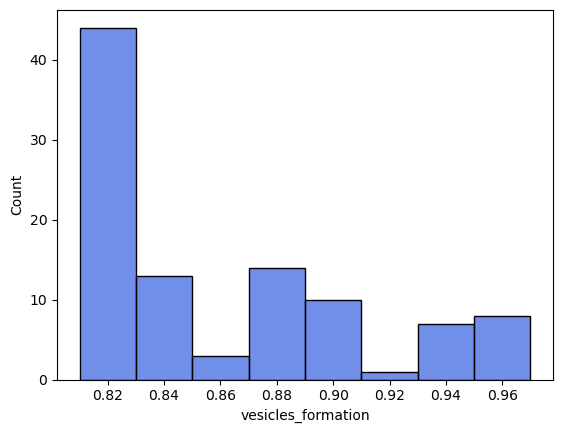

In [61]:
sns.histplot(selected_df['vesicles_formation'], kde=False, color='royalblue') 

<Axes: xlabel='vesicles_formation', ylabel='Count'>

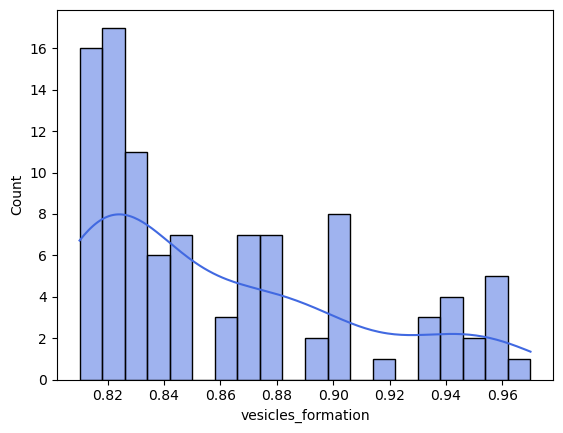

In [114]:
sns.histplot(selected_df['vesicles_formation'], bins=20, kde=True, color='royalblue') 

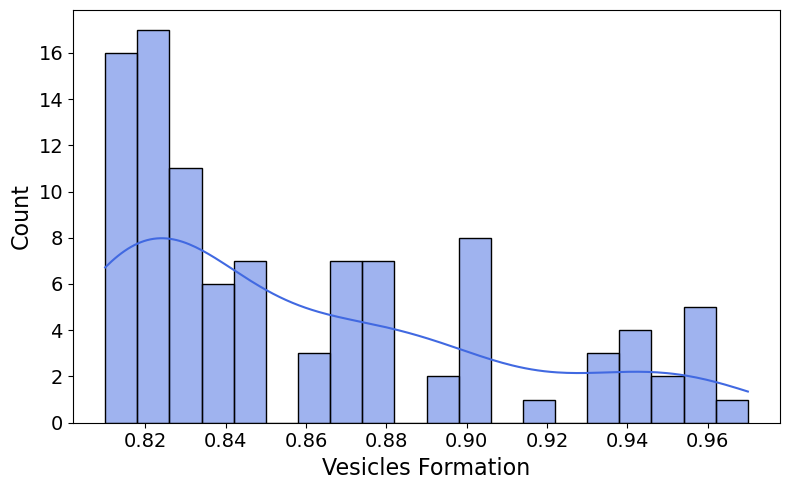

In [116]:
plt.figure(figsize=(8, 5))
sns.histplot(selected_df['vesicles_formation'], bins=20, kde=True, color='royalblue')

plt.xlabel("Vesicles Formation", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("../results/hist_exploration.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()

In [112]:
selected_df.shape

(100, 15)

In [62]:
selected_df.to_csv('selected_df_highprob_smi5.csv', index=False)

In [77]:
df_large.to_csv('df_large_20250905.csv', index=False)

In [63]:
top10 = selected_df.sort_values(by='vesicles_formation', ascending=False).head(10)
top10

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
78,CCCCCCCCCC=O,0.867593,CC(=CCC/C(=C/CO)/C)C,0.113958,CCCCCCCCCCCCCCCC(=O)O,0.988492,CCCCCCCCCC[N+](C)(C)C.[Br-],1.507042,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.786114,CCCC/C=C\CCCCCCCC(=O)O,0.394319,CCCCCCCCOC(=O)CN.Cl,0.222014,0.97
94,CCCCCCCCCC=O,0.355003,CC(=CCC/C(=C/CO)/C)C,0.016486,CCCCCCCCCCCCCCCC(=O)O,1.123896,CCCCCCCCCC[N+](C)(C)C.[Br-],0.566869,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.743641,CCCC/C=C\CCCCCCCC(=O)O,0.177501,CCCCCCCCOC(=O)CN.Cl,0.239710,0.96
79,CCCCCCCCCC=O,1.115505,CC(=CCC/C(=C/CO)/C)C,0.018002,CCCCCCCCCCCCCCCC(=O)O,0.349107,CCCCCCCCCC[N+](C)(C)C.[Br-],0.880346,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.703074,CCCC/C=C\CCCCCCCC(=O)O,0.351497,CCCCCCCCOC(=O)CN.Cl,0.294152,0.96
97,CCCCCCCCCC=O,0.492547,CC(=CCC/C(=C/CO)/C)C,0.058769,CCCCCCCCCCCCCCCC(=O)O,0.753140,CCCCCCCCCC[N+](C)(C)C.[Br-],1.603804,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.760677,CCCC/C=C\CCCCCCCC(=O)O,0.583721,CCCCCCCCOC(=O)CN.Cl,0.112039,0.96
38,CCCCCCCCCC=O,0.908843,CC(=CCC/C(=C/CO)/C)C,0.074489,CCCCCCCCCCCCCCCC(=O)O,0.265795,CCCCCCCCCC[N+](C)(C)C.[Br-],1.767804,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.729261,CCCC/C=C\CCCCCCCC(=O)O,0.004526,CCCCCCCCOC(=O)CN.Cl,0.659746,0.96
90,CCCCCCCCCC=O,0.705383,CC(=CCC/C(=C/CO)/C)C,0.343791,CCCCCCCCCCCCCCCC(=O)O,0.109686,CCCCCCCCCC[N+](C)(C)C.[Br-],1.058780,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.772438,CCCC/C=C\CCCCCCCC(=O)O,0.152865,CCCCCCCCOC(=O)CN.Cl,0.032359,0.96
42,CCCCCCCCCC=O,0.874117,CC(=CCC/C(=C/CO)/C)C,0.196621,CCCCCCCCCCCCCCCC(=O)O,0.981812,CCCCCCCCCC[N+](C)(C)C.[Br-],0.814135,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.512885,CCCC/C=C\CCCCCCCC(=O)O,0.089872,CCCCCCCCOC(=O)CN.Cl,0.338423,0.95
45,CCCCCCCCCC=O,1.383261,CC(=CCC/C(=C/CO)/C)C,0.048677,CCCCCCCCCCCCCCCC(=O)O,0.116831,CCCCCCCCCC[N+](C)(C)C.[Br-],0.831253,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.629104,CCCC/C=C\CCCCCCCC(=O)O,0.493607,CCCCCCCCOC(=O)CN.Cl,0.345057,0.95
85,CCCCCCCCCC=O,0.731110,CC(=CCC/C(=C/CO)/C)C,0.342723,CCCCCCCCCCCCCCCC(=O)O,0.926551,CCCCCCCCCC[N+](C)(C)C.[Br-],1.627068,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.441245,CCCC/C=C\CCCCCCCC(=O)O,0.060319,CCCCCCCCOC(=O)CN.Cl,0.480055,0.94
73,CCCCCCCCCC=O,0.353304,CC(=CCC/C(=C/CO)/C)C,0.174894,CCCCCCCCCCCCCCCC(=O)O,0.298953,CCCCCCCCCC[N+](C)(C)C.[Br-],1.655104,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.471879,CCCC/C=C\CCCCCCCC(=O)O,0.324426,CCCCCCCCOC(=O)CN.Cl,0.454580,0.94


In [64]:
df_info

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,ID,Name,Molecular_Formula,InChI,SMILES
0,A1,Decanal,C10H20O,InChI=1S/C10H20O/c1-2-3-4-5-6-7-8-9-10-11/h10H...,CCCCCCCCCC=O
1,A2,Geraniol,C10H18O,"InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",CC(=CCC/C(=C/CO)/C)C
2,A3,Hexadecanoic acid,C16H32O2,InChI=1S/C16H32O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCCCCCCCCCCCCCC(=O)O
3,A4,Myristoleic acid,C14H26O2,InChI=1S/C14H26O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCC/C=C\CCCCCCCC(=O)O
4,A5,Glycine octylester,C10H22ClNO2,InChI=1S/C10H21NO2.ClH/c1-2-3-4-5-6-7-8-13-10(...,CCCCCCCCOC(=O)CN.Cl
5,A6,Perfluorooctanoic acid,C8HF15O2,"InChI=1S/C8HF15O2/c9-2(10,1(24)25)3(11,12)4(13...",C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F...
6,A7,"1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid",C8H5F13O3S,"InChI=1S/C8H5F13O3S/c9-3(10,1-2-25(22,23)24)4(...",C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)...
7,A8,Heptadecafluorooctanesulfonic acid potassium salt,C8F17KO3S,"InChI=1S/C8HF17O3S.K/c9-1(10,3(13,14)5(17,18)7...",C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C...


In [65]:
original_concentrations = extract_original_concentrations(top10, df_info)

In [66]:
original_concentrations

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Decanal,Geraniol,Hexadecanoic acid,Decyltrimethyl ammonium bromid,Decyl sodium sulfate,Myristoleic acid,Glycine octylester
78,1.381174,0.120706,1.687180,3.513361,4.966224,0.483374,0.248589
94,0.426184,0.016622,2.076819,0.762739,4.718127,0.194229,0.270881
79,2.051110,0.018165,0.417801,1.411734,4.490799,0.421194,0.341988
97,0.636479,0.060531,1.123658,3.971910,4.816372,0.792696,0.118556
38,1.481449,0.077333,0.304468,4.857974,4.636485,0.004537,0.934300
90,1.024622,0.410283,0.115927,1.882850,4.885186,0.165167,0.032889
42,1.396758,0.217282,1.669288,1.257222,3.539808,0.094034,0.402734
45,2.987884,0.049882,0.123929,1.296195,4.099303,0.638215,0.412071
85,1.077386,0.408779,1.525783,4.088930,3.225956,0.062176,0.616163
73,0.423765,0.191120,0.348446,4.233627,3.357415,0.383237,0.575512


In [ ]:
# Plot this composition

In [105]:
original_concentrations_reset = original_concentrations.copy()
original_concentrations_reset.reset_index(drop=True, inplace=True)
original_concentrations_reset

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Decanal,Geraniol,Hexadecanoic acid,Decyltrimethyl ammonium bromid,Decyl sodium sulfate,Myristoleic acid,Glycine octylester
0,1.381174,0.120706,1.687180,3.513361,4.966224,0.483374,0.248589
1,0.426184,0.016622,2.076819,0.762739,4.718127,0.194229,0.270881
2,2.051110,0.018165,0.417801,1.411734,4.490799,0.421194,0.341988
3,0.636479,0.060531,1.123658,3.971910,4.816372,0.792696,0.118556
4,1.481449,0.077333,0.304468,4.857974,4.636485,0.004537,0.934300
5,1.024622,0.410283,0.115927,1.882850,4.885186,0.165167,0.032889
6,1.396758,0.217282,1.669288,1.257222,3.539808,0.094034,0.402734
7,2.987884,0.049882,0.123929,1.296195,4.099303,0.638215,0.412071
8,1.077386,0.408779,1.525783,4.088930,3.225956,0.062176,0.616163
9,0.423765,0.191120,0.348446,4.233627,3.357415,0.383237,0.575512


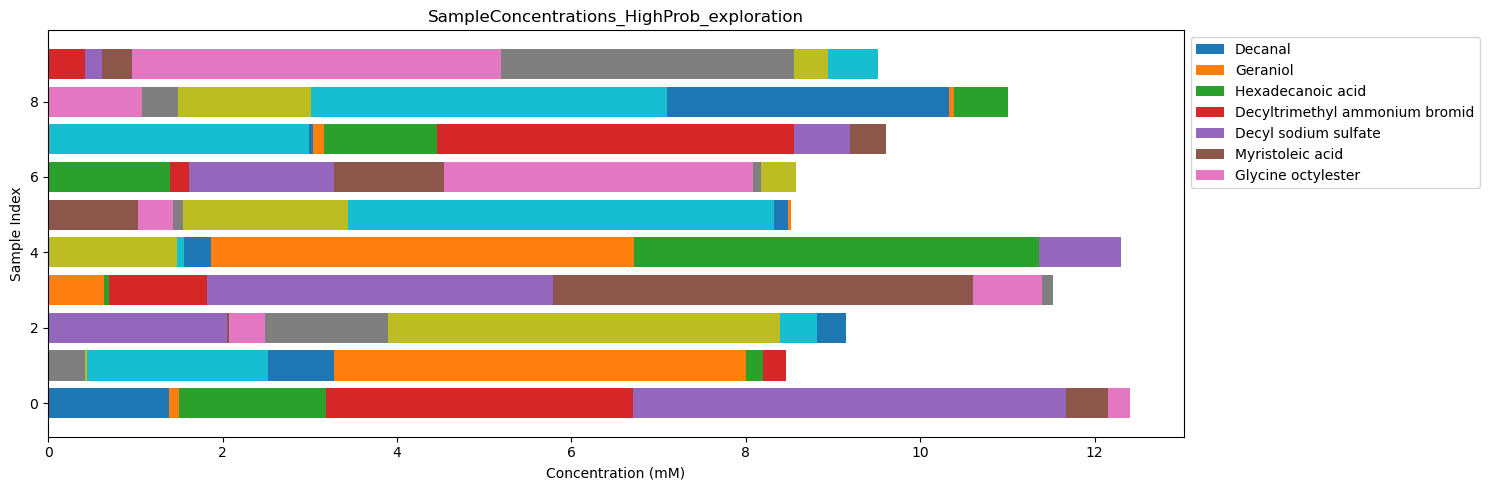

In [84]:
# Function to plot horizontal bars for each sample
def plot_samples(df, title):
    num_samples = df.shape[0]
    features = df.columns

    plt.figure(figsize=(15, num_samples * 0.5))

    for i in range(num_samples):
        sample = df.iloc[i, :]
        left = 0
        for feature in features:
            plt.barh(i, sample[feature], left=left, label=feature if i == 0 else "")
            left += sample[feature]

    plt.xlabel('Concentration (mM)')
    plt.ylabel('Sample Index')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

plot_samples(original_concentrations, 'SampleConcentrations_HighProb_exploration')

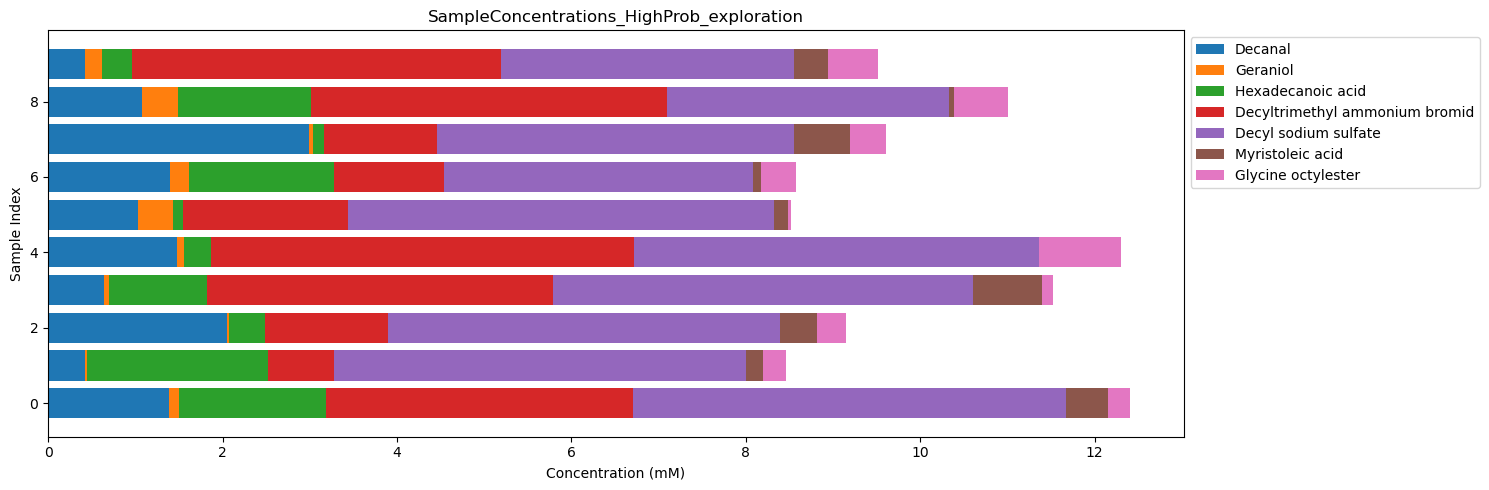

In [107]:
import matplotlib.pyplot as plt

def plot_samples(df, title):
    num_samples = df.shape[0]
    features = df.columns

    # Pick a consistent color palette for features
    cmap = plt.get_cmap("tab10")  
    color_map = {feature: cmap(i % 10) for i, feature in enumerate(features)}

    plt.figure(figsize=(15, num_samples * 0.5))

    for i in range(num_samples):
        sample = df.iloc[i, :]
        left = 0
        for feature in features:
            plt.barh(
                i,
                sample[feature],
                left=left,
                color=color_map[feature],
                label=feature if i == 0 else ""  # only add legend once
            )
            left += sample[feature]

    plt.xlabel('Concentration (mM)')
    plt.ylabel('Sample Index')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    
plot_samples(original_concentrations_reset, 'SampleConcentrations_HighProb_exploration')

In [70]:
original_concentrations.to_csv('original_concentrations_highprob_replace_smi5.csv', index=False)

In [67]:
top10

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
78,CCCCCCCCCC=O,0.867593,CC(=CCC/C(=C/CO)/C)C,0.113958,CCCCCCCCCCCCCCCC(=O)O,0.988492,CCCCCCCCCC[N+](C)(C)C.[Br-],1.507042,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.786114,CCCC/C=C\CCCCCCCC(=O)O,0.394319,CCCCCCCCOC(=O)CN.Cl,0.222014,0.97
94,CCCCCCCCCC=O,0.355003,CC(=CCC/C(=C/CO)/C)C,0.016486,CCCCCCCCCCCCCCCC(=O)O,1.123896,CCCCCCCCCC[N+](C)(C)C.[Br-],0.566869,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.743641,CCCC/C=C\CCCCCCCC(=O)O,0.177501,CCCCCCCCOC(=O)CN.Cl,0.239710,0.96
79,CCCCCCCCCC=O,1.115505,CC(=CCC/C(=C/CO)/C)C,0.018002,CCCCCCCCCCCCCCCC(=O)O,0.349107,CCCCCCCCCC[N+](C)(C)C.[Br-],0.880346,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.703074,CCCC/C=C\CCCCCCCC(=O)O,0.351497,CCCCCCCCOC(=O)CN.Cl,0.294152,0.96
97,CCCCCCCCCC=O,0.492547,CC(=CCC/C(=C/CO)/C)C,0.058769,CCCCCCCCCCCCCCCC(=O)O,0.753140,CCCCCCCCCC[N+](C)(C)C.[Br-],1.603804,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.760677,CCCC/C=C\CCCCCCCC(=O)O,0.583721,CCCCCCCCOC(=O)CN.Cl,0.112039,0.96
38,CCCCCCCCCC=O,0.908843,CC(=CCC/C(=C/CO)/C)C,0.074489,CCCCCCCCCCCCCCCC(=O)O,0.265795,CCCCCCCCCC[N+](C)(C)C.[Br-],1.767804,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.729261,CCCC/C=C\CCCCCCCC(=O)O,0.004526,CCCCCCCCOC(=O)CN.Cl,0.659746,0.96
90,CCCCCCCCCC=O,0.705383,CC(=CCC/C(=C/CO)/C)C,0.343791,CCCCCCCCCCCCCCCC(=O)O,0.109686,CCCCCCCCCC[N+](C)(C)C.[Br-],1.058780,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.772438,CCCC/C=C\CCCCCCCC(=O)O,0.152865,CCCCCCCCOC(=O)CN.Cl,0.032359,0.96
42,CCCCCCCCCC=O,0.874117,CC(=CCC/C(=C/CO)/C)C,0.196621,CCCCCCCCCCCCCCCC(=O)O,0.981812,CCCCCCCCCC[N+](C)(C)C.[Br-],0.814135,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.512885,CCCC/C=C\CCCCCCCC(=O)O,0.089872,CCCCCCCCOC(=O)CN.Cl,0.338423,0.95
45,CCCCCCCCCC=O,1.383261,CC(=CCC/C(=C/CO)/C)C,0.048677,CCCCCCCCCCCCCCCC(=O)O,0.116831,CCCCCCCCCC[N+](C)(C)C.[Br-],0.831253,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.629104,CCCC/C=C\CCCCCCCC(=O)O,0.493607,CCCCCCCCOC(=O)CN.Cl,0.345057,0.95
85,CCCCCCCCCC=O,0.731110,CC(=CCC/C(=C/CO)/C)C,0.342723,CCCCCCCCCCCCCCCC(=O)O,0.926551,CCCCCCCCCC[N+](C)(C)C.[Br-],1.627068,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.441245,CCCC/C=C\CCCCCCCC(=O)O,0.060319,CCCCCCCCOC(=O)CN.Cl,0.480055,0.94
73,CCCCCCCCCC=O,0.353304,CC(=CCC/C(=C/CO)/C)C,0.174894,CCCCCCCCCCCCCCCC(=O)O,0.298953,CCCCCCCCCC[N+](C)(C)C.[Br-],1.655104,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.471879,CCCC/C=C\CCCCCCCC(=O)O,0.324426,CCCCCCCCOC(=O)CN.Cl,0.454580,0.94


In [80]:
top10.to_csv('top10_highprob_replace_smi5.csv', index=False)

In [68]:
solutes = original_concentrations.columns
dispense_df = get_dispense_volume(original_concentrations, solutes, allow_zero=True)
len(dispense_df)

10

In [69]:
dispense_df

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Decanal (50 mM),Decanal (10 mM),Decanal (2 mM),Geraniol (50 mM),Geraniol (10 mM),Geraniol (2 mM),Hexadecanoic acid (50 mM),Hexadecanoic acid (10 mM),Hexadecanoic acid (2 mM),Decyltrimethyl ammonium bromid (50 mM),Decyltrimethyl ammonium bromid (10 mM),Decyltrimethyl ammonium bromid (2 mM),Decyl sodium sulfate (50 mM),Decyl sodium sulfate (10 mM),Decyl sodium sulfate (2 mM),Myristoleic acid (15 mM),Myristoleic acid (3 mM),Glycine octylester (10 mM),Glycine octylester (2 mM)
78,5.5,0.0,0.0,0.0,0.0,12.1,6.7,0.0,0.0,14.1,0.0,0.0,19.9,0.0,0.0,6.4,0.0,5.0,0.0
94,0.0,8.5,0.0,0.0,0.0,1.7,8.3,0.0,0.0,0.0,15.3,0.0,18.9,0.0,0.0,0.0,12.9,5.4,0.0
79,8.2,0.0,0.0,0.0,0.0,1.8,0.0,8.4,0.0,5.6,0.0,0.0,18.0,0.0,0.0,5.6,0.0,6.8,0.0
97,0.0,12.7,0.0,0.0,0.0,6.1,4.5,0.0,0.0,15.9,0.0,0.0,19.3,0.0,0.0,10.6,0.0,0.0,11.9
38,5.9,0.0,0.0,0.0,0.0,7.7,0.0,6.1,0.0,19.4,0.0,0.0,18.5,0.0,0.0,0.0,0.3,18.7,0.0
90,4.1,0.0,0.0,0.0,8.2,0.0,0.0,0.0,11.6,7.5,0.0,0.0,19.5,0.0,0.0,0.0,11.0,0.0,3.3
42,5.6,0.0,0.0,0.0,4.3,0.0,6.7,0.0,0.0,5.0,0.0,0.0,14.2,0.0,0.0,0.0,6.3,8.1,0.0
45,12.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,12.4,5.2,0.0,0.0,16.4,0.0,0.0,8.5,0.0,8.2,0.0
85,4.3,0.0,0.0,0.0,8.2,0.0,6.1,0.0,0.0,16.4,0.0,0.0,12.9,0.0,0.0,0.0,4.1,12.3,0.0
73,0.0,8.5,0.0,0.0,0.0,19.1,0.0,7.0,0.0,16.9,0.0,0.0,13.4,0.0,0.0,5.1,0.0,11.5,0.0


In [71]:
dispense_df.to_csv('dispense_df_highprob_replace_smi5.csv', index=False)

### Hypervolume calculations

In [92]:
from scipy.spatial import ConvexHull

points =   original_concentrations
hull = ConvexHull(points)
volume1 = hull.volume
print(volume1)

0.0008368735616712558


In [93]:
df_conc = selected_df.filter(like="conc")
points =   df_conc
hull = ConvexHull(points)
volume2 = hull.volume
print(volume2)

0.05470142012834871


In [94]:
volume1/volume2*100
# So only account for 1.5%, means this samples are rare and lies in a tiny region

1.5298936658457074

In [95]:
# How about comparing to 1000 samples generated?

In [97]:
new_data_path = '/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/results_generate_experimental_plan1_20250606.pkl'
data = load(new_data_path)
df_new2 = data["df_new2"]

In [101]:
df_conc = df_new2.filter(like="conc")
points =   df_conc
hull = ConvexHull(points)
volume3 = hull.volume
print(volume3)

4.177735401300682


In [102]:
volume1/volume3*100
#0.02% for the 1000 generated

0.02003175120690282